# Проект по исследованию данных об инвестициях венчурных фондов в компании-стартапы

**Цель исследования** - овладеть более продвинутыми навыками SQL.

**Задачи исследования** - произвести различные выгрузки данных о постах и пользователях на StackOverflow с помощью SQL.

**Источник данных** - версия базы данных StackOverflow (сервиса вопросов и ответов о программировании), где хранятся данные о постах за 2008 год, но в таблицах присутствует информацию и о более поздних оценках, которые эти посты получили. 

**Навыки и инструменты** - SQL, оконные функции.

# Схема базы данных

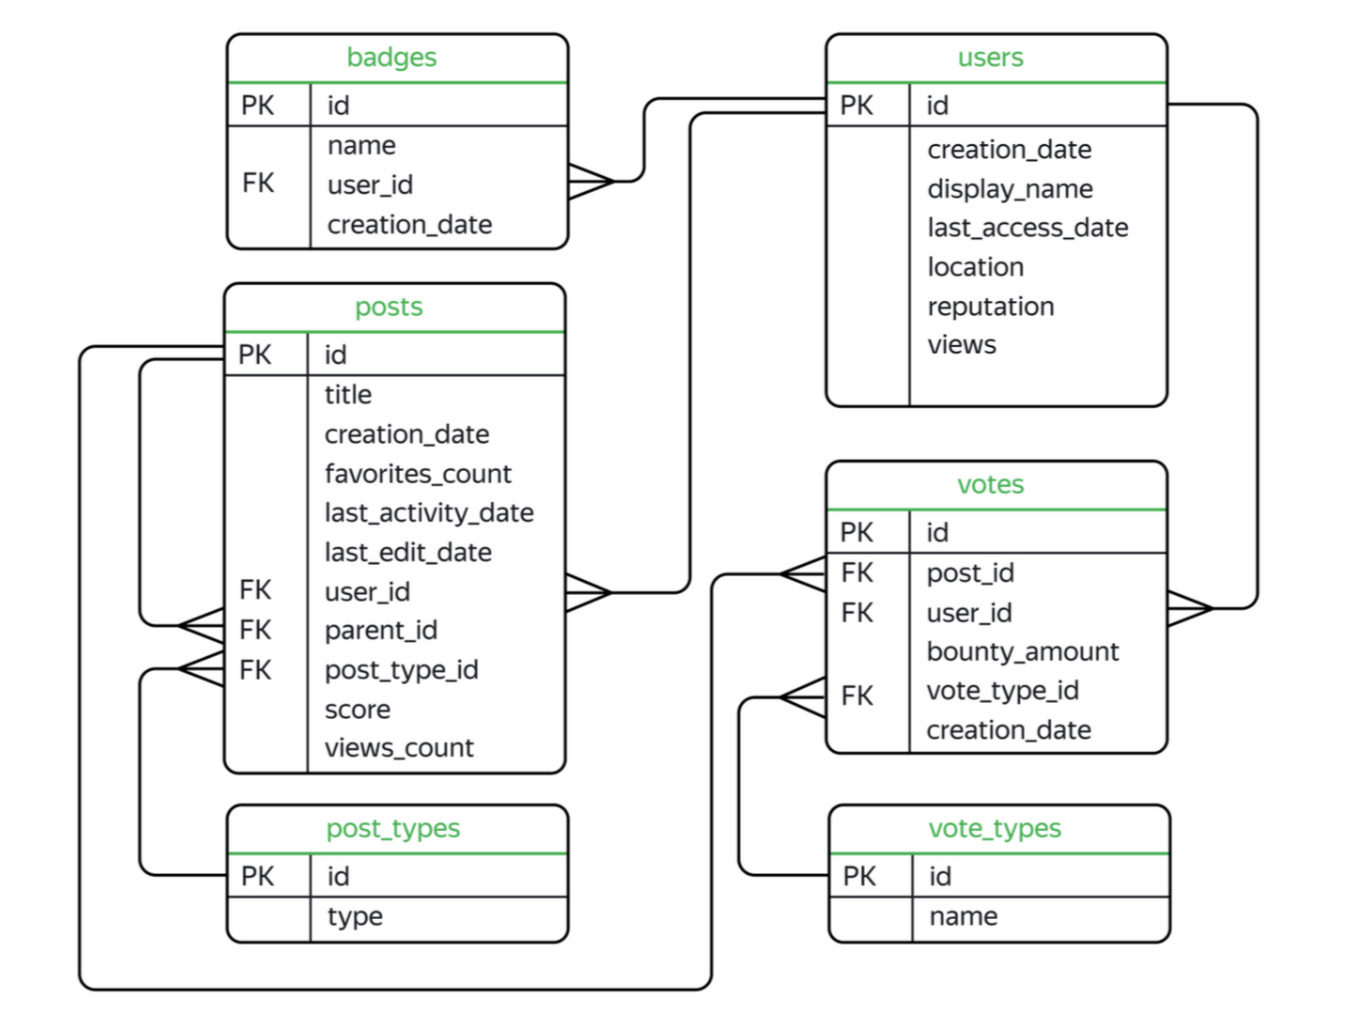

# Описание таблиц, содержащихся в базе данных

**`badges`**

Хранит информацию о значках, которые присуждаются за разные достижения:
* `id` - идентификатор значка, первичный ключ таблицы;
* `name` - пазвание значка;
* `user_id` - идентификатор пользователя, которому присвоили значок, внешний ключ, отсылающий к таблице `users`;
* `creation_date` - дата присвоения значка.

**`post_types`**

Содержит информацию о типе постов. Их может быть два: `question` — пост с вопросом, и `answer` — пост с ответом.
* `id` - идентификатор поста, первичный ключ таблицы;
* `type` - тип поста.

**`posts`**

Содержит информацию о постах:
* `id` - идентификатор поста, первичный ключ таблицы;
* `title` - заголовок поста;
* `creation_date` - дата создания поста;
* `favorites_count` - число, которое показывает, сколько раз пост добавили в «Закладки»;
* `last_activity_date` - дата последнего действия в посте, например комментария;
* `last_edit_date` - дата последнего изменения поста;
* `user_id` - идентификатор пользователя, который создал пост, внешний ключ к таблице `users`;
* `parent_id` - если пост написали в ответ на другую публикацию, в это поле попадёт идентификатор поста с вопросом;
* `post_type_id` - идентификатор типа поста, внешний ключ к таблице `post_types`;
* `score` - количество очков, которое набрал пост;
* `views_count` - количество просмотров.

**`users`**

Содержит информацию о пользователях:
* `id` - идентификатор пользователя, первичный ключ таблицы;
* `creation_date` - дата регистрации пользователя;
* `display_name` - имя пользователя;
* `last_accsess_date` - дата последнего входа;
* `location` - местоположение;
* `reputation` - очки репутации, которые получают за хорошие вопросы и полезные ответы;
* `views` - число просмотров профиля пользователя.

**`vote_types`**

Содержит информацию о типах голосов. Голос — это метка, которую пользователи ставят посту. 
Типов голосов бывает несколько:
* `UpMod` — такую отметку получают посты с вопросами или ответами, которые пользователи посчитали уместными и полезными.
* `DownMod` — такую отметку получают посты, которые показались пользователям наименее полезными.
* `Close` — такую метку ставят опытные пользователи сервиса, если заданный вопрос нужно доработать или он вообще не подходит для платформы.
* `Offensive` — такую метку могут поставить, если пользователь ответил на вопрос в грубой и оскорбительной манере, например, указав на неопытность автора поста.
* `Spam` — такую метку ставят в случае, если пост пользователя выглядит откровенной рекламой.

Описание таблицы:
* `id` - идентификатор типа голоса, первичный ключ;
* `name` - название метки.

**`votes`**

Содержит информацию о голосах за посты:
* `id` - идентификатор голоса, первичный ключ;
* `post_id` - идентификатор поста, внешний ключ к таблице `posts`;
* `user_id` - идентификатор пользователя, который поставил посту голос, внешний ключ к таблице `users`;
* `bounty_amount` - сумма вознаграждения, которое назначают, чтобы привлечь внимание к посту;
* `vote_type_id` - идентификатор типа голоса, внешний ключ к таблице `vote_types`;
* `creation_date` - дата назначения голоса.

## Задания первой части

**Задание 1**

Найдите количество вопросов, которые набрали больше 300 очков или как минимум 100 раз были добавлены в «Закладки».

In [ ]:
SELECT COUNT(*)
FROM stackoverflow.posts
WHERE post_type_id = 1 AND (score > 300 OR favorites_count >= 100)

**Задание 2**

Сколько в среднем в день задавали вопросов с 1 по 18 ноября 2008 включительно? Результат округлите до целого числа.

SELECT ROUND(AVG(count))
FROM (SELECT DATE_TRUNC('day', creation_date)::date dt,
       COUNT(id)
FROM stackoverflow.posts
WHERE post_type_id = 1 AND creation_date::date BETWEEN '2008-11-01' AND '2008-11-18'
GROUP BY 1) q_cnt

**Задание 3**

Сколько пользователей получили значки сразу в день регистрации? Выведите количество уникальных пользователей.

In [ ]:
SELECT COUNT(DISTINCT b.user_id)
FROM stackoverflow.badges b
LEFT JOIN stackoverflow.users u ON  b.user_id = u.id
WHERE b.creation_date::date = u.creation_date::date

**Задание 4**

Сколько уникальных постов пользователя с именем Joel Coehoorn получили хотя бы один голос?

In [ ]:
SELECT COUNT(DISTINCT p.id)
FROM stackoverflow.posts p
JOIN stackoverflow.votes v ON p.id = v.post_id
WHERE p.user_id IN 
            (SELECT id
            FROM stackoverflow.users
            WHERE display_name LIKE '%Joel Coehoorn%')

**Задание 5**

Выгрузите все поля таблицы `vote_types`. Добавьте к таблице поле `rank`, в которое войдут номера записей в обратном порядке. Таблица должна быть отсортирована по полю `id`.

In [ ]:
SELECT *,
       ROW_NUMBER() OVER (ORDER BY id DESC) AS rank
FROM stackoverflow.vote_types
ORDER BY id

**Задание 6**

Отберите 10 пользователей, которые поставили больше всего голосов типа `Close`. Отобразите таблицу из двух полей: идентификатором пользователя и количеством голосов. Отсортируйте данные сначала по убыванию количества голосов, потом по убыванию значения идентификатора пользователя.

In [ ]:
SELECT user_id,
       COUNT(vote_type_id) --OVER (PARTITION BY user_id ORDER BY vote_type_id)
FROM stackoverflow.votes
WHERE vote_type_id IN (
        SELECT id
        FROM stackoverflow.vote_types
        WHERE name = 'Close')
GROUP BY 1
ORDER BY 2 DESC,
         1 DESC
LIMIT 10

**Задание 7**

Отберите 10 пользователей по количеству значков, полученных в период с 15 ноября по 15 декабря 2008 года включительно.

Отобразите несколько полей:
* идентификатор пользователя;
* число значков;
* место в рейтинге — чем больше значков, тем выше рейтинг.

Пользователям, которые набрали одинаковое количество значков, присвойте одно и то же место в рейтинге.
Отсортируйте записи по количеству значков по убыванию, а затем по возрастанию значения идентификатора пользователя.

In [ ]:
SELECT *,
       DENSE_RANK() OVER (ORDER BY count DESC) rating
FROM (SELECT user_id,
      COUNT(id)
      FROM stackoverflow.badges
      WHERE CAST(creation_date AS date) BETWEEN '2008-11-15' AND '2008-12-15'
      GROUP BY 1) cnt
ORDER BY 2 DESC,
         1
LIMIT 10

**Задание 8**

Сколько в среднем очков получает пост каждого пользователя?  Сформируйте таблицу из следующих полей:
* заголовок поста;
* идентификатор пользователя;
* число очков поста;
* среднее число очков пользователя за пост, округлённое до целого числа.

Не учитывайте посты без заголовка, а также те, что набрали ноль очков.

In [ ]:
SELECT *,
       ROUND(AVG(score) OVER (PARTITION BY user_id)) avg_score
FROM (SELECT title,
             user_id,
             score
      FROM stackoverflow.posts
      WHERE title != '' AND score != 0) score

**Задание 9**

Отобразите заголовки постов, которые были написаны пользователями, получившими более 1000 значков. Посты без заголовков не должны попасть в список.

In [ ]:
SELECT title
FROM (SELECT user_id,
             COUNT(id)
      FROM stackoverflow.badges
      GROUP BY 1) badges_cnt
JOIN stackoverflow.posts ON badges_cnt.user_id = posts.user_id
WHERE count > 1000 AND title != ''

**Задание 10**

Напишите запрос, который выгрузит данные о пользователях из США (англ. United States). 

Разделите пользователей на три группы в зависимости от количества просмотров их профилей:
* пользователям с числом просмотров больше либо равным 350 присвойте группу 1;
* пользователям с числом просмотров меньше 350, но больше либо равно 100 — группу 2;
* пользователям с числом просмотров меньше 100 — группу 3.

Отобразите в итоговой таблице идентификатор пользователя, количество просмотров профиля и группу. Пользователи с нулевым количеством просмотров не должны войти в итоговую таблицу.

In [ ]:
SELECT id,
       views,
       CASE 
           WHEN views >= 350 THEN 1
           WHEN views >= 100 AND views < 350 THEN 2
           ELSE 3
       END
FROM stackoverflow.users
WHERE location LIKE '%United States%' AND views != 0

**Задание 11**

Дополните предыдущий запрос. Отобразите лидеров каждой группы — пользователей, которые набрали максимальное число просмотров в своей группе. Выведите поля с идентификатором пользователя, группой и количеством просмотров. Отсортируйте таблицу по убыванию просмотров, а затем по возрастанию значения идентификатора.

In [ ]:
SELECT id,
       cat_views,
       views
FROM (SELECT *,
             MAX(views) OVER (PARTITION BY cat_views ) max_value
      FROM (SELECT id,
                   views,
                   CASE 
                       WHEN views >= 350 THEN 1
                       WHEN views >= 100 AND views < 350 THEN 2
                       ELSE 3
                   END cat_views
            FROM stackoverflow.users
            WHERE location LIKE '%United States%' AND views != 0) u) v_max
            
WHERE max_value = views
ORDER BY 3 DESC, 1;

**Задание 12**

Посчитайте ежедневный прирост новых пользователей в ноябре 2008 года. Сформируйте таблицу с полями:
* номер дня;
* число пользователей, зарегистрированных в этот день;
* сумму пользователей с накоплением.

In [ ]:
SELECT DISTINCT EXTRACT(DAY FROM creation_date),
       COUNT(id) OVER (PARTITION BY creation_date::date) cnt_day,
       COUNT(id) OVER (ORDER BY creation_date::date) total_cnt
FROM stackoverflow.users
WHERE creation_date::date BETWEEN '2008-11-01' AND '2008-11-30'
ORDER BY 1

**Задание 13**

Для каждого пользователя, который написал хотя бы один пост, найдите интервал между регистрацией и временем создания первого поста. 

Отобразите:
* идентификатор пользователя;
* разницу во времени между регистрацией и первым постом.

In [ ]:
SELECT u.id,
       MIN(p.creation_date) - u.creation_date time_diff
FROM stackoverflow.users u
JOIN stackoverflow.posts p ON u.id = p.user_id
GROUP BY 1, u.creation_date

## Задания второй части

**Задание 1**

Выведите общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

In [ ]:
SELECT DISTINCT DATE_TRUNC('month', creation_date)::date,
       SUM(views_count) OVER (PARTITION BY DATE_TRUNC('month', creation_date)::date) total_views
FROM stackoverflow.posts
WHERE EXTRACT (YEAR FROM creation_date::date) = '2008'
ORDER BY 2 DESC

**Задание 2**

Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя выведите количество уникальных значений `user_id`. Отсортируйте результат по полю с именами в лексикографическом порядке.

In [ ]:
SELECT u.display_name,
       COUNT(DISTINCT user_id)
FROM stackoverflow.posts p
JOIN stackoverflow.post_types pt ON p.post_type_id = pt.id
JOIN stackoverflow.users u ON p.user_id = u.id
WHERE pt.type = 'Answer' 
AND DATE_TRUNC('day', p.creation_date) >= DATE_TRUNC('day', u.creation_date)
AND DATE_TRUNC('day', p.creation_date) <= DATE_TRUNC('day', u.creation_date) + INTERVAL '1 month'
GROUP BY u.display_name
HAVING COUNT(*) > 100
ORDER BY display_name;

**Задание 3**

Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

In [ ]:
SELECT DISTINCT DATE_TRUNC('month', creation_date)::date dt,
       COUNT(id) OVER (PARTITION BY DATE_TRUNC('month', creation_date)::date)
FROM stackoverflow.posts
WHERE user_id IN (
                SELECT DISTINCT p.user_id
                FROM stackoverflow.posts p
                JOIN stackoverflow.users u ON p.user_id = u.id
                WHERE (u.creation_date::date BETWEEN '2008-09-01' AND '2008-09-30')
                AND (p.creation_date::date BETWEEN '2008-12-01' AND '2008-12-31'))
ORDER BY 1 DESC;

**Задание 4**

Используя данные о постах, выведите несколько полей:
* идентификатор пользователя, который написал пост;
* дата создания поста;
* количество просмотров у текущего поста;
* сумму просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

In [ ]:
SELECT user_id,
       creation_date,
       views_count,
       SUM(views_count) OVER (PARTITION BY user_id ORDER BY creation_date)
FROM stackoverflow.posts

**Задание 5**

Сколько в среднем дней в период с 1 по 7 декабря 2008 года включительно пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат.

In [ ]:
SELECT  ROUND(AVG(day_cnt))
FROM (SELECT DISTINCT user_id,
             COUNT(dt) OVER (PARTITION BY user_id) day_cnt
      FROM (SELECT DISTINCT user_id,
                   creation_date::date dt
            FROM stackoverflow.posts
            WHERE creation_date::date BETWEEN '2008-12-01' AND '2008-12-07') date) days

**Задание 6**

На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? 

Отобразите таблицу со следующими полями:
* номер месяца;
* количество постов за месяц;
* процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.

Напомним, что при делении одного целого числа на другое в PostgreSQL в результате получится целое число, округлённое до ближайшего целого вниз. Чтобы этого избежать, переведите делимое в тип `numeric`.

In [ ]:
SELECT *,
       ROUND(((m_cnt::numeric/(LAG(m_cnt) OVER (ORDER BY dt))-1) *100.0),2) diff
FROM (SELECT DISTINCT EXTRACT(MONTh FROM creation_date::date) dt,
             COUNT(id) OVER (PARTITION BY DATE_TRUNC('month', creation_date)::date) m_cnt
      FROM stackoverflow.posts
      WHERE creation_date::date BETWEEN '2008-09-01' AND '2008-12-31') month_count

**Задание 7**

Выгрузите данные активности пользователя, который опубликовал больше всего постов за всё время. 

Выведите данные за октябрь 2008 года в таком виде:
* номер недели;
* дата и время последнего поста, опубликованного на этой неделе.

In [ ]:
WITH

best_user AS 
(SELECT DISTINCT user_id,
       COUNT(id) 
FROM stackoverflow.posts
GROUP BY 1
ORDER BY 2 DESC
LIMIT 1)
 
SELECT DISTINCT EXTRACT(WEEK FROM p.creation_date),
       --p.creation_date,
       LAST_VALUE(p.creation_date) OVER (ORDER BY EXTRACT(WEEK FROM p.creation_date))
FROM stackoverflow.posts p
JOIN best_user ON best_user.user_id = p.user_id
WHERE creation_date::date BETWEEN '2008-10-01' AND '2008-10-31';